In [465]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, inv
import warnings  
warnings.filterwarnings('ignore')

In [578]:
#lattice constant
a = 5.431
#rotation angle
phi = 0#-np.pi/90
theta =0#-np.pi/90

From Rodrigues' rotation formula, we know for a given axis $\bar k$ and a given rotation angle $\theta$, rotation matrix $J$ is 
$$J(\theta, \bar k) = 1 + sin\theta K+(1-cos\theta)K^2$$ 
where $$K = \begin{bmatrix} 0 & -k_z & k_y \\ k_z & 0 & -k_x \\ -k_y & k_x & 0 \end{bmatrix}$$

In [579]:
def rotate(vector, angle, axis):
    K = np.array([[0, -axis[2], axis[1]],[axis[2], 0, -axis[0]], [-axis[1], axis[0], 0]])
    return vector + np.sin(angle)*K.dot(vector) + (1-np.cos(angle))*K.dot(K.dot(vector))

The selection rules for Si lattice are (1)h,k,l are all odd or all even (2)h+k+l != 4n+2

In [580]:
# generate reciprocal lattice
lattice = []
for h in range(-20,21):
    for k in range(-20,21):
        for l in range(-20, 21):
            if (h%2==0 and k%2==0 and l%2==0) or (h%2==1 and k%2==1 and l%2==1):
                if (h+k+l)%4!=2:lattice.append([h,k,l])
lattice = np.array(lattice)*(1/a)           

The incident beam $K_0=J(\theta, [\bar1 \bar1 0])\cdot J(\phi, [\bar1 1 2])\cdot[\bar1 1 \bar1]$ 

In [581]:
k_0 = np.array([-1,1,-1])
k_0 = rotate(rotate(k_0, phi, np.array([-1,1,2])), theta, np.array([-1,-1,0]))

(-0.5, 1458.5, 594.5, -0.5)

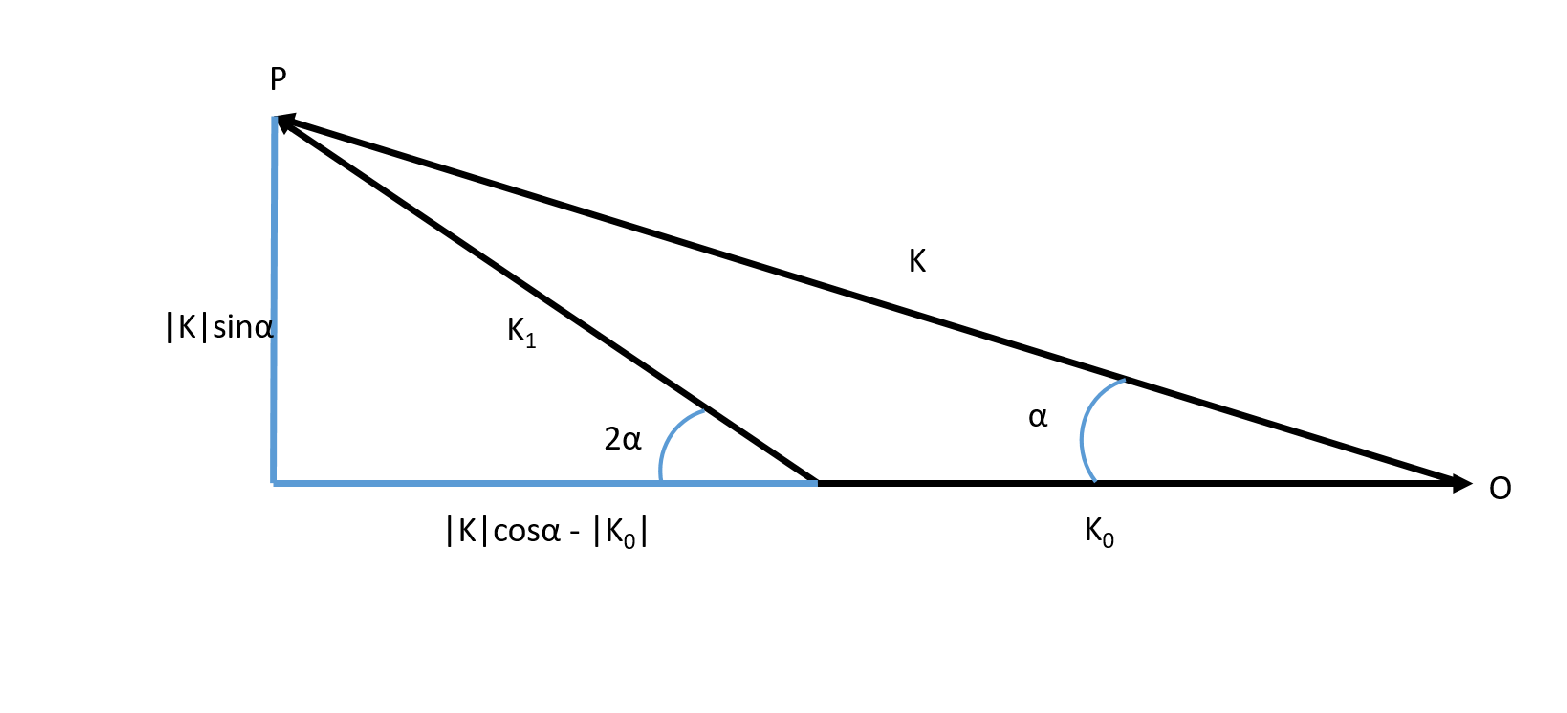

In [582]:
image = plt.imread('triangle.png')
plt.figure(dpi=300)
plt.imshow(image)
plt.axis('off')

From geometric configuration, we can derive the relationship between $\lambda$, $\bar K$ and $\alpha$, where $|\bar K_0| = |\bar K_1| = \frac{1}{\lambda}$

$$|\bar K_1|^2 = |\bar K|^2 sin^2 \alpha + (|\bar K|cos \alpha - |\bar K_0|)^2$$
Solve for $\lambda$, we get
$$\lambda = \frac{2cos\alpha}{|\bar K|}$$

In [583]:
cos = lattice.dot(-k_0)/norm(k_0)/norm(lattice, axis=1)

In [584]:
wavelength = 2/norm(lattice, axis=1)*cos

$\bar K_1 = \bar K + \bar K_0$

In [585]:
k_1 = lattice + np.array([k_0/norm(k_0)/w for w in wavelength])

Select $\bar K_1$ vectors that meet the requisite $ 0.6 <\lambda< 1.2$. Also note that Back-reflection mode was used. We demand $2\alpha < \frac{\pi}{2}$.

In [586]:
k_1 = k_1[(wavelength>0.6) & (wavelength<1.2) & (2*np.arccos(cos)<np.pi/2)]

In [587]:
allowed_lattice = lattice[(wavelength>0.6) & (wavelength<1.2) & (2*np.arccos(cos)<np.pi/2)]

We define a basis $xyz$, where
$$x=J(\theta, [\bar1 \bar1 0])\cdot J(\phi, [\bar1 1 2])\cdot[1 \bar1 1]$$ 
$$y=J(\theta, [\bar1 \bar1 0])\cdot J(\phi, [\bar1 1 2])\cdot[\bar1 1 2]$$ 
$$z=J(\theta, [\bar1 \bar1 0])\cdot J(\phi, [\bar1 1 2])\cdot[\bar1 \bar1 0]$$ 
Note that $[\bar1 \bar1 0] = [1 \bar1 1]\times[\bar1 1 2]$

In [588]:
x = np.array([1,-1,1])
y = np.array([-1,1,2])
z = np.array([-1,-1,0])
x = rotate(rotate(x/norm(x), phi, np.array([-1,1,2])), theta, np.array([-1,-1,0]))
y = rotate(rotate(y/norm(y), phi, np.array([-1,1,2])), theta, np.array([-1,-1,0]))
z = rotate(rotate(z/norm(z), phi, np.array([-1,1,2])), theta, np.array([-1,-1,0]))

To project vector $[1 \bar1 1]$ on to the center of the screen, we like to perform a coordination transformation $M$ such that
$$M\cdot[\frac{x}{|x|}|\frac{y}{|y|}|\frac{z}{|z|}] = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$$
We can immediately identify that $M = [\frac{x}{|x|}|\frac{y}{|y|}|\frac{z}{|z|}]^{-1}$.

In [589]:
M = inv(np.vstack((x,y,z)).T)

Transform all $\bar K_1$ vectors by $M$ and rescale them so their first components equal 9. Now their second components and third components are the vertical coordinates and the horizontal coordinates on the screen, respectively.

In [590]:
real = M.dot(k_1.T)
real = real/real[0,:]*9

(-5, 5)

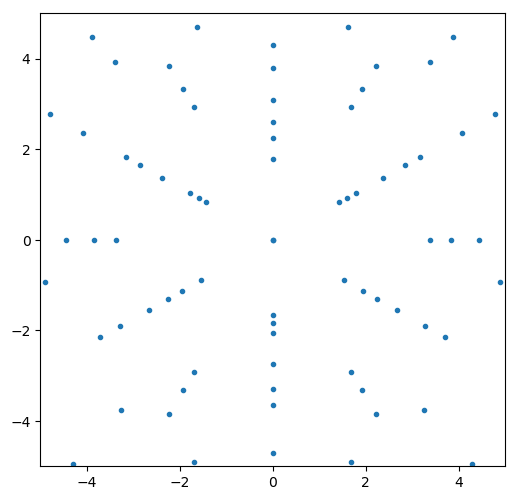

In [591]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(real[2,:], real[1,:], marker='.')
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

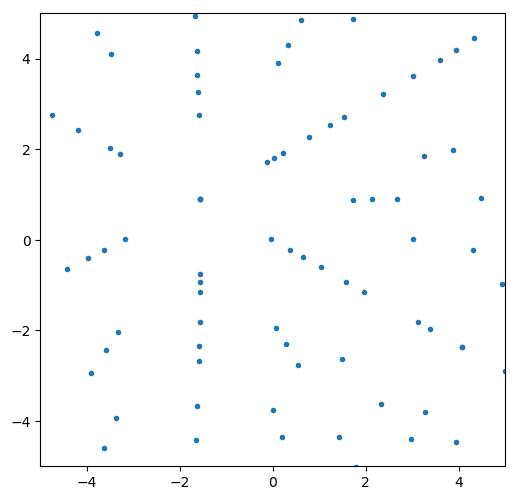

In [577]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(real[2,:], real[1,:], marker='.')
plt.xlim(-5,5)
plt.ylim(-5,5)